# 케라스와 텐서플로 소개

## 텐서플로란?

## 케라스란?

## 케라스와 텐서플로의 간략한 역사

## 딥러닝 작업 환경 설정하기

### 주피터 노트북: 권장하는 딥러닝 실험 도구

### 코랩 사용하기

#### 코랩 시작하기

#### pip로 패키지 설치하기

#### GPU 런타임 사용하기

## 텐서플로 시작하기

#### 상수 텐서와 변수

**모두 1 또는 모두 0인 텐서**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**랜덤 텐서**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.7189114 ]
 [ 0.00264509]
 [-1.543211  ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.7547444 ]
 [0.00125206]
 [0.9056035 ]], shape=(3, 1), dtype=float32)


**넘파이 배열에 값 할당하기**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**텐서플로 변수 만들기**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.58872557],
       [0.73657054],
       [1.0027444 ]], dtype=float32)>


**텐서플로 변수에 값 할당하기**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**변수 일부에 값 할당하기**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**`assign_add` 사용하기**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 텐서 연산: 텐서플로에서 수학 계산하기

**기본적인 수학 연산**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### GradientTape API 다시 살펴 보기

**`GradientTape` 사용하기**

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**상수 입력 텐서와 함께 `GradientTape` 사용하기**

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

### 엔드-투-엔드 예제: 텐서플로 선형 분류기

**텐서플로로 밑바닥부터 linear classificator를 구현해보자!!**

#### 1. 2D 평면에 두 클래스의 랜덤한 포인트 생성하기
- 선형적으로 잘 구분되는 합성 데이터
- 특정한 평균과 covariance matrix를 가진 랜덤한 분포에서 좌표 값을 뽑아 각 클래스의 포인트를 생성
  - covariance matrix: 포인트 cloud 형태를 결정
  - 평균: 평면에서의 위치
- 두 포인트 cloud는 같은 모양을 띠지만 다른 위치에 있을 것.

In [4]:
import numpy as np

num_samples_per_class = 1000

# first point class
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],             # 평균이 (0,3) -> 2D 포인트임을 알 수 있음
    cov=[[1, 0.5],[0.5, 1]], # 왼쪽 아래에서 오른쪽 위로 향하는 타원형의 포인트 클라우드
    size=num_samples_per_class)
# second point class
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

negative_samples.shape, positive_samples.shape

((1000, 2), (1000, 2))

#### 2. **두 클래스를 (2000, 2) 크기의 한 배열로 쌓기**
수직으로 연결하여 (2000,2) 크기의 하나의 배열로 만들기.

In [6]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

#### 3. **(0과 1로 구성된) 타깃 생성하기**
- (2000,1) 크기의 0 배열과 1 배열을 합쳐 타깃 레이블 생성.
- inputs[i]가 클래스 0에 속하면 targets[i,0]은 0.

In [7]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

#### 4. **두 클래스의 포인트를 그래프로 그리기**
- matplotlib 이용

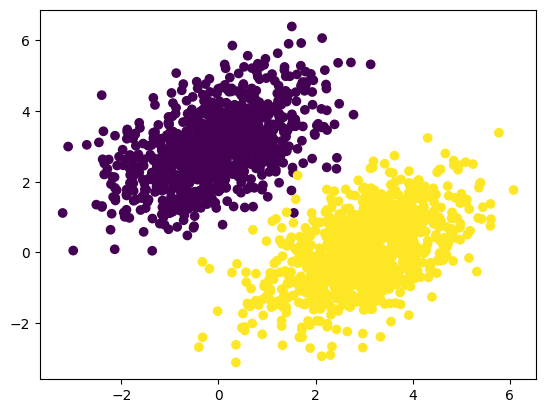

In [8]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

#### 5. **선형 분류기의 변수 만들기**
- 해당 선형 분류기는 하나의 affin transform
  - prediction = W dot input + b
- 예측과 타깃 사이의 차이를 제곱한 값을 최소화하도록 훈련

In [12]:
import tensorflow as tf

input_dim = 2  # input: 2D point
output_dim = 1 # output: each sample's score, 0 to 1
# randomly initialized W
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
# zero initialized b
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

W,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.96127427],
        [0.5505718 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

#### 5. **정방향 패스 함수**
- 이 선형 분류기는 2D 입력을 다루기 때문에 W는 2개의 스칼라 가중치 w1과 w2 (W=[[w1], [w2]])
- b는 하나의 스칼라 값
- 따라서 prediction = [[w1], [w2]] dot [x,y] + b = w1*x + w2*y + b

In [13]:
def model(inputs):
    return tf.matmul(inputs, W) + b

#### 6. **평균 제곱 오차 손실 함수**

In [14]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) # 오차를 제곱
    return tf.reduce_mean(per_sample_losses) # 평균

#### 7. **훈련 스텝 함수**
- 손실을 최소화하도록 가중치 W와 b를 업데이트
- 간단한 구현을 위해 미니 배치대신 배치, 전체 데이터를 사용
  - 2000개 샘플에 대해 정방향 패스와 그레디언트를 계산해야 돼서 좀 오래 걸림
  - 하지만 손실을 감소하는데 훨씬 효과적
- 따라서 훈련 스텝의 횟수가 많이 필요하지 않고 일반적으로 큰 학습률 사용 가능

In [17]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape: # 그래디언트 테이프 블록 안의 정방향 패스
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    # 가중치에 대한 손실의 그래디언트
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # 가중치 업데이트
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

#### 8. **배치 훈련 루프**

In [18]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 4.7238
1번째 스텝의 손실: 0.6509
2번째 스텝의 손실: 0.2126
3번째 스텝의 손실: 0.1549
4번째 스텝의 손실: 0.1388
5번째 스텝의 손실: 0.1281
6번째 스텝의 손실: 0.1187
7번째 스텝의 손실: 0.1103
8번째 스텝의 손실: 0.1026
9번째 스텝의 손실: 0.0956
10번째 스텝의 손실: 0.0892
11번째 스텝의 손실: 0.0834
12번째 스텝의 손실: 0.0782
13번째 스텝의 손실: 0.0734
14번째 스텝의 손실: 0.0690
15번째 스텝의 손실: 0.0650
16번째 스텝의 손실: 0.0614
17번째 스텝의 손실: 0.0581
18번째 스텝의 손실: 0.0551
19번째 스텝의 손실: 0.0524
20번째 스텝의 손실: 0.0499
21번째 스텝의 손실: 0.0477
22번째 스텝의 손실: 0.0456
23번째 스텝의 손실: 0.0437
24번째 스텝의 손실: 0.0420
25번째 스텝의 손실: 0.0405
26번째 스텝의 손실: 0.0391
27번째 스텝의 손실: 0.0378
28번째 스텝의 손실: 0.0366
29번째 스텝의 손실: 0.0356
30번째 스텝의 손실: 0.0346
31번째 스텝의 손실: 0.0337
32번째 스텝의 손실: 0.0329
33번째 스텝의 손실: 0.0322
34번째 스텝의 손실: 0.0316
35번째 스텝의 손실: 0.0310
36번째 스텝의 손실: 0.0304
37번째 스텝의 손실: 0.0299
38번째 스텝의 손실: 0.0295
39번째 스텝의 손실: 0.0290


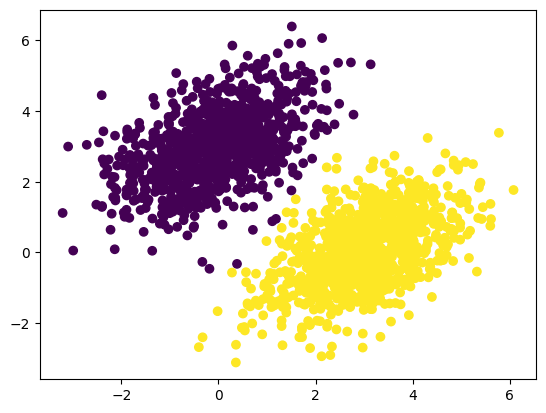

In [19]:
predictions = model(inputs)
# 타겟이 0, 1이기 때문에 예측 값이 0.5보다 작으면 0, 크면 1
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

#### **9. 두 클래스를 잘 구분하는 직선(혹은 고차원에서는 hyperplane, 초평면)을 그려보자!**
- 이 직선 혹은 hyperplane이 선형 분류기임!

포인트 [x,y]에 대한 예측 값은
- prediction == [[w1], [w2]] dot [x,y] + b
- == w1 * x + w2 * y + b
- 따라서 클래스 0: w1 * x + w2 * y + b < 0.5
- 클래스 1: w1 * x + w2 * y + b > 0.5
- 찾고자 하는 직선의 방정식: w1 * x + w2 * y + b = 0.5
- -> y = -w1/w2 * x + (0/5 - b)/w2

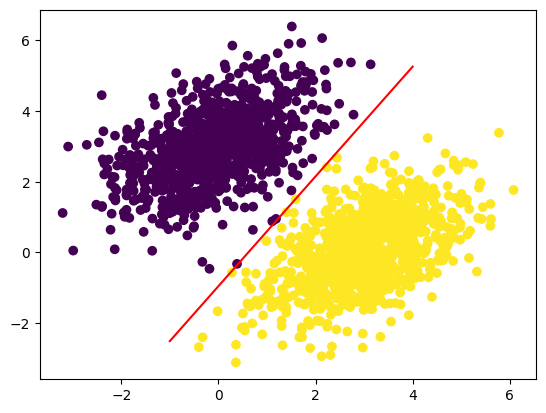

In [20]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## 신경망의 구조: 핵심 Keras API 이해하기

### 층: 딥러닝의 구성 요소

#### 케라스의 Layer 클래스

**`Layer`의 서브클래스로 구현한 `Dense` 층**

In [23]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer): # 모든 케라스 layer는 Layer 클라스를 상속

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape): # 가중치 생성
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        # add_weight() : 가중치를 간편하게 만들 수 있음
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [24]:
# SimpleDense layer의 객체를 생성
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
# 테스트용
input_tensor = tf.ones(shape=(2, 784))
# layer 호출
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 자동 크기 추론: 동적으로 층 만들기
- layer compatibiliy
  - 모든 층이 특정 크기의 입력 텐셔만 받고 특정 크기의 출력 텐서만 반환

In [26]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu") # 32개의 출력 unit을 가진 밀집 층 dense layer
# 차원이 32인 텐서를 반환
# - 32차원의 입력을 받는 층에만 연결 가능

근데 케라스에서는 대부분의 경우 크기를 동적으로 호환시켜 줌.
- 입력 크기에 대한 정보를 받지 않지만, 입력 크기를 처음 본 입력의 크기로 추론

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [28]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

## 층에서 모델로

- 케라스에서 모델을 만드는 방법
  1. 직접 Model 클래스의 서브 클래스를 만들기
  2. 함수형 API 사용

- 모델의 구조는 hypothesis space(가설 공간)를 정의
  - 사정에 정의된 (space of possibility)가능성 있는 공간 안에서 피드백 신호의 도움을 받아 입력 데이터의 유용한 표현을 찾는 것
  - topology(네트워크 구조)를 선택하면 가능성 있는 공간, 즉 가설 공간이 입력 데이터를 출력 데이터로 매핑
  - 이 연산에 관련된 가중치 텐서의 값을 찾음

- 가설 공간의 정의한다는 것.
  - 데이터를 학습하려면 데이터에 대한 가정을 해야 함
  - 학습을 시작하기 전, 모델이 가지게 될 사전 지식을 인코딩하는 것.

In [30]:
# 선형 분류기를 정의
model = keras.Sequential([keras.layers.Dense(1)])

## “컴파일” 단계: 학습 과정 설정 (모델 구조 정의 후)
- Loss function / objective function
- Optimizer
- Metric

### `compile()` : 훈련 과정을 설정
#### Optimizer
- SGD
  - Gradient descent (with momentum) optimizer
  - “SGD”
- RMSprop
  - 최근 경로의 곡면 변화량을 측정하기 위해 지수가중이동평균을 사용
  - 그라디언트 크기에 따라 학습률을 조절, 안정적인 학습을 수행
  - tenserflow에서는 RMSprop에서 네스테로프 모멘텀이 아닌 일반 모멘텀을 사용
  - “rmsprop”
- Adam
  - RMSProp과 Momentum을 조합한 알고리즘
  - 일반적인 알고리즘에 많이 사용된다
  - Momentum방식처럼, 이전 계산해온 기울기 지수 평균을 저장하고, RMSProp 방식처럼 기울기 제곱값에 지수평균을 저장
  - “adam”
- Adagrad
  - an optimizer with parameter-specific learning rates
  - 훈련 중, 파라미터가 업데이터 되는 빈도에 따라 조정됨
  - 파라미터가 더 많은 업데이트를 받을 수록, 업데이트는 더 적어짐
  - “adagrad”

#### Loss function
- CategoricalCrossentropy
  - 다중 클래스 분류에서 라벨이 one-hot encoding 형식일 경우.
  - “CategoricalCrossentropy”
- SparseCategoricalCrossentropy
  - 다중 클래스 분류 문제에서 정수형 레이블을 사용할 경우 사용
  - "sparse_categorical_crossentropy”
- BinaryCrossentropy
  - 이진분류에 대한 cross entropy 방식
  - “BinaryCrossentropy”
- MeanSquaredError
  - The mean of squares of errors between labels and predictions.
  - “mean_squared_error”

#### Metric
- CategoricalAccuracy
  - 다중클래스 분류에서 one-hot 인코딩된 레이블과 예측값이 일치하는 빈도를 계산
  - “CategoricalAccuracy”
- SparseCategoricalAccuracy
  - How often predictions match integer labels.
  - - total, count : y_pred 이랑 y_true가 얼마자 자주 맞았는지 계산하는데 사용됨
    - - 빈도 = total / count
      - “sparse_categorical_accuracy”
- BinaryAccuracy
  - 예측값이 이진 레이블과 일치하는 빈도를 계산
  - “binary_accuracy”
- AUC
  - ROC 또는 PR 곡선의 아래 면적
  - 모델의 분류 성능 품질을 나타내는 지표로 활용
  - “AUC”

In [31]:
model.compile(optimizer="rmsprop",       # optimizer
              loss="mean_squared_error", # loss function
              metrics=["accuracy"])      # metric: list type

In [32]:
# name 대신 인스턴스 객체도 사용 가능
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), # learning_rate를 설정
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 손실(목적) 함수 선택하기
- 문제에 맞는 올바른 손실 함수를 선택하지 않으면 네트워크가 손실을 최소화하기 위해 편법을 사용할 수도 있음.
- 분류, 회귀, 시퀀스 예측 등에 간단한 가이드 라인이 있음
  - e.g.
    - 2개의 클래스가 있는 분류 문제: binary crossentropy
    - 여러 개의 클래스가 있는 분류 문제: categorical crossentropy
 

### `fit()` 메서드 이해하기
- 훈련 루프를 구현
- 훈련할 데이터 : input and target
- 훈련할 epoch
- 미니 배치 경사 하강법의 각 에포크에서 사용할 배치 크기

**넘파이 데이터로 `fit()` 메서드 호출하기**
- `fit()`을 호출하면 History 객체가 반환
- History 객체
  - dictionary type
  - "loss" 또는 특정 측정 지표 이름의 키와 각 에포크 값의 리스트를 매핑

In [33]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.2175 - loss: 1.6081   
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.2319 - loss: 1.5026 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.2222 - loss: 1.5052 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.2426 - loss: 1.4646 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.2226 - loss: 1.5176 


In [34]:
history.history

{'binary_accuracy': [0.21950000524520874,
  0.22050000727176666,
  0.22100000083446503,
  0.22349999845027924,
  0.22450000047683716],
 'loss': [1.5527534484863281,
  1.5387763977050781,
  1.5267829895019531,
  1.5151305198669434,
  1.5036855936050415]}

### 검증 데이터에서 손실과 측정 지표 모니터링하기
- 머신러닝의 목표는 범용적으로 잘 동작하는 모델을 얻는 것!
- 새로운 데이터에 모델이 어떻게 동작하는지 예상하기 위해 훈련 데이터의 일부를 검증 데이터, validation data로 떼어 놓는 것.
- validation loss: 학습된 모델이 실제로 테스트가 잘 되는지 판단하기 위한 값
  - training loss는 학습 중 그라디언트 디센트를 하기 위해 계산하는 값

**`validation_data` 매개변수 사용하기**

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9780 - loss: 0.2866 - val_binary_accuracy: 0.9617 - val_loss: 0.0713
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9551 - loss: 0.0664 - val_binary_accuracy: 1.0000 - val_loss: 0.0247
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9516 - loss: 0.0731 - val_binary_accuracy: 0.9783 - val_loss: 0.0732
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9517 - loss: 0.0756 - val_binary_accuracy: 0.9150 - val_loss: 0.1588
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9338 - loss: 0.0869 - val_binary_accuracy: 0.9917 - val_loss: 0.0444


### 추론(inference): 훈련한 모델 사용하기
- 모델을 사용하여 예측해보자!

In [36]:
# 모델의 __call__() 메서드를 호출
# 모든 입력을 한 번에 처리하여 데이터가 많으면 불가능.. 메모리 부족..
# numpy array나 tensor를 입력 값으로 받고 tensorflow의 tensor를 반환
# predictions = model(val_inputs)

# predict 메서드 사용
# 데이터를 작은 배치로 순회하여 numpy array로 예측 반환
# tensorflow Dataset 객체도 처리 가능
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[0.1470932 ]
 [0.3636375 ]
 [0.9939754 ]
 [0.1538555 ]
 [0.07184553]
 [1.1095457 ]
 [0.03100318]
 [0.16061488]
 [1.1703058 ]
 [1.0180175 ]]


## 요약